# Homework 9: Variational Autoencoders


In [26]:
%matplotlib inline

import torch
import matplotlib.pyplot as plt
from matplotlib import pyplot
from torchvision import utils
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch import nn
import math

In [17]:
def show_image(image): 
    pyplot.imshow(image, cmap="gray")

def show_mnist_batch(sample_batched):
    """Show images for a batch of samples."""
    images_batch = sample_batched[0]
    batch_size = len(images_batch)
    im_size = images_batch.size(2)

    grid = utils.make_grid(images_batch)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))
    plt.title('Batch from DataLoader')

## Load data

In [12]:
!mkdir data

mkdir: data: File exists


In [13]:
transformations = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])
mnist_train = datasets.MNIST('./data', download=True, train=True, transform=transformations)
mnist_test = datasets.MNIST('./data', download=True, train=False, transform=transformations)

print(f"{len(mnist_train)} training images")
print(f"{len(mnist_test)} test images")

60000 training images
10000 test images


In [20]:
batch_size =  128
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=4)
test_loader = DataLoader(mnist_test, batch_size=batch_size, num_workers=4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


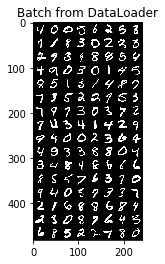

In [23]:
# Displays the first batch of images
for i, batch in enumerate(train_loader):
    if i==1:
        break
    show_mnist_batch(batch)

## VAE Model

In [27]:
class VAE(nn.Module):
    def __init__(self):
        self.fc1 = nn.Linear(784, 400)